# HW 4-1

## Classifying Movie reviews

**Import and prepare IMDB dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels)= imdb.load_data(num_words=10000)

# Convert imdb review data to vectorized sequence
# each dimension corresponds to a word in the dictionary 
# the value is words frequencey
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Split training data into validation and training set**

In [2]:
# Validation Set
x_val = x_train[:10000]  
y_val = y_train[:10000] 

# Training Set
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


Check that the models used so far are reasonable.

While keeping other parameters the same as before:
* Try using one or three intermediate layers instead of two. See how doing 
so affects validation and test accuracy
* Try using layers with more units or fewer units: 8 units vs 32 units
* Try using the `mse` loss function instead of `binary_crossentropy`

## Summary

The data in the table below summarizes the training, validation, and testing accuracy at the optimal number of epochs for the 5 models. Below these tables the code can be found along with training/validation accuracy plots for each model.

 Model |number of layers |nodes per layer |loss function | optimal number of epochs | training accuracy | validation accuracy | testing accuracy 
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
Model 1| 1 | 16 | binary cross entropy | 4 | 0.944| 0.891| 0.877
Model 2| 3 | 16 | binary cross entropy | 4 | 0.964| 0.895| 0.883
Model 3| 2 | 8 | binary cross entropy | 5 | 0.954| 0.892| 0.883
Model 4| 2 | 32 | binary cross entropy | 4 | 0.951| 0.880| 0.875
Model 5| 2 | 16 | mse| 6 | 0.973| 0.891| 0.880

## Models

**Model 1**
* 1 Hidden Layers
* 16 nodes (relu activation)
* binary cross entropy loss

In [11]:
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
 7/30 [======>.......................] - ETA: 0s - loss: 0.6535 - accuracy: 0.6272

2022-03-05 14:05:09.687160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 33ms/step - loss: 0.5371 - accuracy: 0.7551 - val_loss: 0.4088 - val_accuracy: 0.8658
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3551 - accuracy: 0.9043

2022-03-05 14:05:10.640070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 14ms/step - loss: 0.3461 - accuracy: 0.8885 - val_loss: 0.3420 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2767 - accuracy: 0.9094 - val_loss: 0.2999 - val_accuracy: 0.8920
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2279 - accuracy: 0.9272 - val_loss: 0.2839 - val_accuracy: 0.8959
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1938 - accuracy: 0.9400 - val_loss: 0.2775 - val_accuracy: 0.8955
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1704 - accuracy: 0.9476 - val_loss: 0.2769 - val_accuracy: 0.8959
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1512 - accuracy: 0.9545 - val_loss: 0.2786 - val_accuracy: 0.8950
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1317 - accuracy: 0.9634 - val_loss: 0.2949 - val_accuracy: 0.8902
Epoch 9/20
30/30 [======

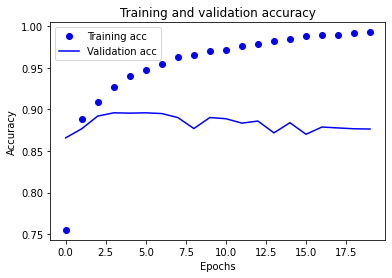

In [12]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [24]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4


2022-03-05 14:10:54.716272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 54ms/step - loss: 0.5374 - accuracy: 0.7633 - val_loss: 0.4115 - val_accuracy: 0.8621


2022-03-05 14:10:56.350876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/4
30/30 [==============================] - 0s 15ms/step - loss: 0.3490 - accuracy: 0.8899 - val_loss: 0.3309 - val_accuracy: 0.8876
Epoch 3/4
30/30 [==============================] - 0s 13ms/step - loss: 0.2760 - accuracy: 0.9121 - val_loss: 0.3623 - val_accuracy: 0.8611
Epoch 4/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2276 - accuracy: 0.9290 - val_loss: 0.2946 - val_accuracy: 0.8914


In [25]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 4ms/step - loss: 0.3224 - accuracy: 0.8769
 Training accuracy: 0.9438000321388245
 Validation accuracy: 0.8914000391960144
 Testing accuracy: 0.8768800497055054


**Model 2**
* 3 Hidden Layers
* 16 nodes (relu activation)
* binary cross entropy loss

In [26]:
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-05 14:11:21.781015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 37ms/step - loss: 0.5515 - accuracy: 0.7487 - val_loss: 0.4528 - val_accuracy: 0.8187


2022-03-05 14:11:22.907631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3408 - accuracy: 0.8850 - val_loss: 0.3472 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2534 - accuracy: 0.9132 - val_loss: 0.3186 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2039 - accuracy: 0.9309 - val_loss: 0.2858 - val_accuracy: 0.8958
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1584 - accuracy: 0.9497 - val_loss: 0.4436 - val_accuracy: 0.8467
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1446 - accuracy: 0.9517 - val_loss: 0.3360 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1246 - accuracy: 0.9592 - val_loss: 0.3300 - val_accuracy: 0.8863
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0954 - accuracy: 0.9716 - val_loss: 0.3430 - val_accuracy: 0.8858
Epoch 9/20
30

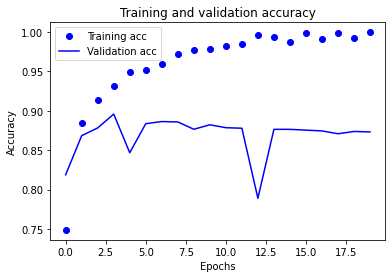

In [27]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [28]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4


2022-03-05 14:11:46.483611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 36ms/step - loss: 0.5591 - accuracy: 0.7402 - val_loss: 0.4088 - val_accuracy: 0.8613


2022-03-05 14:11:47.621649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3417 - accuracy: 0.8842 - val_loss: 0.3718 - val_accuracy: 0.8573
Epoch 3/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2428 - accuracy: 0.9197 - val_loss: 0.4142 - val_accuracy: 0.8405
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2054 - accuracy: 0.9313 - val_loss: 0.2842 - val_accuracy: 0.8952


In [29]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 4ms/step - loss: 0.3102 - accuracy: 0.8823
 Training accuracy: 0.963533341884613
 Validation accuracy: 0.8952000141143799
 Testing accuracy: 0.8822800517082214


**Model 3**
* 2 Hidden Layers
* 8 nodes (relu activation)
* binary cross entropy loss

In [30]:
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-05 14:12:12.251632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.7441

2022-03-05 14:12:13.457321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 41ms/step - loss: 0.5758 - accuracy: 0.7441 - val_loss: 0.4737 - val_accuracy: 0.8373
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4116 - accuracy: 0.8779 - val_loss: 0.4114 - val_accuracy: 0.8423
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3243 - accuracy: 0.9043 - val_loss: 0.3349 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2636 - accuracy: 0.9222 - val_loss: 0.3064 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2233 - accuracy: 0.9364 - val_loss: 0.2927 - val_accuracy: 0.8923
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1909 - accuracy: 0.9461 - val_loss: 0.3027 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1670 - accuracy: 0.9511 - val_loss: 0.2843 - val_accuracy: 0.8931
Epoch 8/20
30/30 [======

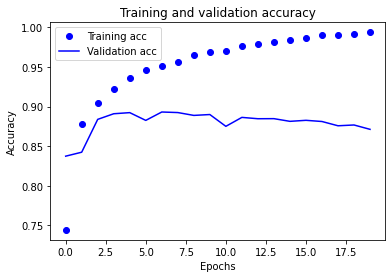

In [31]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **5**

In [34]:
num_epochs = 5
# Build Model
model = keras.Sequential([ layers.Dense(8, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/5


2022-03-05 14:13:02.297163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5785 - accuracy: 0.7521

2022-03-05 14:13:03.594073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 41ms/step - loss: 0.5785 - accuracy: 0.7521 - val_loss: 0.4781 - val_accuracy: 0.8457
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.4097 - accuracy: 0.8810 - val_loss: 0.3819 - val_accuracy: 0.8760
Epoch 3/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3161 - accuracy: 0.9081 - val_loss: 0.3302 - val_accuracy: 0.8874
Epoch 4/5
30/30 [==============================] - 1s 17ms/step - loss: 0.2533 - accuracy: 0.9275 - val_loss: 0.3437 - val_accuracy: 0.8653
Epoch 5/5
30/30 [==============================] - 1s 17ms/step - loss: 0.2138 - accuracy: 0.9363 - val_loss: 0.2912 - val_accuracy: 0.8919


In [35]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.3111 - accuracy: 0.8832
 Training accuracy: 0.9539333581924438
 Validation accuracy: 0.8919000625610352
 Testing accuracy: 0.8831600546836853


**Model 4**
* 2 Hidden Layers
* 32 nodes (relu activation)
* binary cross entropy loss

In [36]:
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-05 14:13:26.070954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7326

2022-03-05 14:13:27.325467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 40ms/step - loss: 0.5515 - accuracy: 0.7343 - val_loss: 0.3769 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3325 - accuracy: 0.8821 - val_loss: 0.3258 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2420 - accuracy: 0.9157 - val_loss: 0.3024 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1927 - accuracy: 0.9331 - val_loss: 0.2860 - val_accuracy: 0.8939
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1619 - accuracy: 0.9443 - val_loss: 0.3858 - val_accuracy: 0.8630
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1293 - accuracy: 0.9567 - val_loss: 0.2945 - val_accuracy: 0.8915
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1139 - accuracy: 0.9634 - val_loss: 0.3176 - val_accuracy: 0.8849
Epoch 8/20
30/30 [======

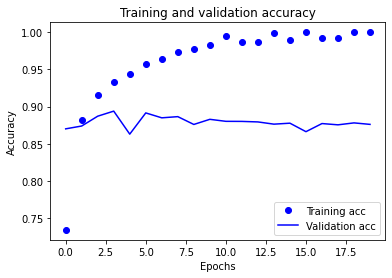

In [37]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **4**

In [40]:
num_epochs = 4
# Build Model
model = keras.Sequential([ layers.Dense(32, activation="relu"),
                          layers.Dense(32, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4


2022-03-05 14:14:12.047626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5451 - accuracy: 0.7453

2022-03-05 14:14:13.187607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 37ms/step - loss: 0.5451 - accuracy: 0.7453 - val_loss: 0.3845 - val_accuracy: 0.8597
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3334 - accuracy: 0.8808 - val_loss: 0.2974 - val_accuracy: 0.8896
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.2449 - accuracy: 0.9109 - val_loss: 0.2816 - val_accuracy: 0.8909
Epoch 4/4
30/30 [==============================] - 0s 13ms/step - loss: 0.1935 - accuracy: 0.9322 - val_loss: 0.3034 - val_accuracy: 0.8806


In [41]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 4ms/step - loss: 0.3240 - accuracy: 0.8747
 Training accuracy: 0.951200008392334
 Validation accuracy: 0.8806000351905823
 Testing accuracy: 0.8746800422668457


**Model 5**
* 2 Hidden Layers
* 16 nodes (relu activation)
* mean square error (mse) loss

In [42]:
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-03-05 14:14:40.226123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 36ms/step - loss: 0.1846 - accuracy: 0.7449 - val_loss: 0.1431 - val_accuracy: 0.8228


2022-03-05 14:14:41.308360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1011 - accuracy: 0.8896 - val_loss: 0.1025 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0752 - accuracy: 0.9153 - val_loss: 0.1115 - val_accuracy: 0.8480
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0618 - accuracy: 0.9302 - val_loss: 0.0906 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0489 - accuracy: 0.9475 - val_loss: 0.0872 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0415 - accuracy: 0.9553 - val_loss: 0.0814 - val_accuracy: 0.8933
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.9625 - val_loss: 0.0829 - val_accuracy: 0.8879
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0281 - accuracy: 0.9722 - val_loss: 0.0848 - val_accuracy: 0.8879
Epoch 9/20
30

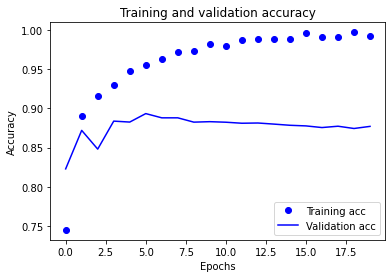

In [43]:
history_dict = history.history
acc = history_dict["accuracy"] 
val_acc = history_dict["val_accuracy"]

plt.plot(range(20), acc, "bo", label="Training acc") 
plt.plot(range(20), val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the plot above the optimal number of epochs appears to be **6**

In [44]:
num_epochs = 6
# Build Model
model = keras.Sequential([ layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])

#Compile Model
model.compile(optimizer="rmsprop", loss="mse",metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train,epochs=num_epochs, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/6


2022-03-05 14:15:17.495434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 35ms/step - loss: 0.1812 - accuracy: 0.7472 - val_loss: 0.1188 - val_accuracy: 0.8618


2022-03-05 14:15:18.563885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/6
30/30 [==============================] - 0s 15ms/step - loss: 0.0994 - accuracy: 0.8850 - val_loss: 0.1084 - val_accuracy: 0.8604
Epoch 3/6
30/30 [==============================] - 0s 14ms/step - loss: 0.0732 - accuracy: 0.9163 - val_loss: 0.0889 - val_accuracy: 0.8909
Epoch 4/6
30/30 [==============================] - 0s 14ms/step - loss: 0.0609 - accuracy: 0.9312 - val_loss: 0.0828 - val_accuracy: 0.8954
Epoch 5/6
30/30 [==============================] - 0s 15ms/step - loss: 0.0507 - accuracy: 0.9421 - val_loss: 0.0850 - val_accuracy: 0.8888
Epoch 6/6
30/30 [==============================] - 0s 14ms/step - loss: 0.0433 - accuracy: 0.9516 - val_loss: 0.0826 - val_accuracy: 0.8913


In [45]:
results_train = model.evaluate(partial_x_train, partial_y_train) 
results_val = model.evaluate(x_val, y_val) 
results_test = model.evaluate(x_test, y_test) 
print(f" Training accuracy: {results_train[1]}")
print(f" Validation accuracy: {results_val[1]}")
print(f" Testing accuracy: {results_test[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.0904 - accuracy: 0.8800
 Training accuracy: 0.9731333255767822
 Validation accuracy: 0.8913000226020813
 Testing accuracy: 0.8799600601196289
